In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test)= mnist.load_data()

class_names = ['top','trouser','pullover','dress','coat','sandal','shirt','sneaker','bag','ankle boot']

X_train = X_train/255.0
X_test = X_test/255.0

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Building the model
model = Sequential()
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

# Training the model
# Recording model history and adding batch sizes
history = model.fit(X_train,y_train,epochs = 10,batch_size=10)

# Testing the model
test_loss , test_acc = model.evaluate(X_test,y_test)
print(test_acc)

from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


4423680/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
6000/6000 [==============================] - 9s 2ms/step - loss: 0.4829 - accuracy: 0.8260
Epoch 2/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3694 - accuracy: 0.8644
Epoch 3/10
6000/6000 [==============================] - 10s 2ms/step - loss: 0.3355 - accuracy: 0.8781
Epoch 4/1

0.8855

In [3]:
from sklearn.metrics import accuracy_score
y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.8855

# PLotting Learning Curve and Confusion Matrix in Tensorflow 2.0

In [4]:
history.history

{'accuracy': [0.826033353805542,
  0.8643500208854675,
  0.8781499862670898,
  0.8862000107765198,
  0.8913333415985107,
  0.8953499794006348,
  0.8996833562850952,
  0.9039833545684814,
  0.9069833159446716,
  0.9088000059127808],
 'loss': [0.4828540086746216,
  0.3693993091583252,
  0.3354998826980591,
  0.31075620651245117,
  0.2941988408565521,
  0.28157031536102295,
  0.2696687579154968,
  0.2580055892467499,
  0.24855907261371613,
  0.24347150325775146]}

KeyError: ignored

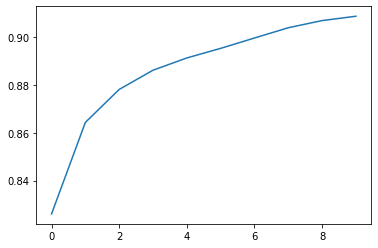

In [5]:
# Plot training and validation accuracy values
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()
# Plot training and validation loss values
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Train","Validation"],loc="upper left")
plt.show()